<a href="https://colab.research.google.com/github/leoliu5550/colab_for_nn_homework/blob/master/Optimizer_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 優化器比較
[各種優化器解釋](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)

In [142]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 建立假數據

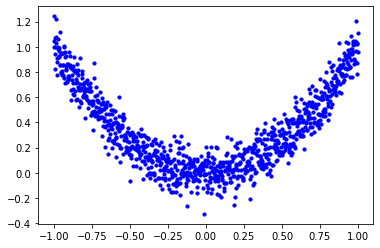

In [143]:
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))
plt.scatter(x.numpy(), y.numpy(),s=10,c='b')
plt.show()

In [144]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)

# 建立NN模型

In [145]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(1, 20)   # hidden layer
    self.predict = torch.nn.Linear(20, 1)   # output layer

  def forward(self, x):
    x = F.relu(self.hidden(x))      # activation function for hidden layer
    x = self.predict(x)             # linear output
    return x

## 對每一個優化器建立一個Net

In [146]:
net_SGD         = Net()
net_Momentum       = Net()
net_RMSprop       = Net()
net_Adam         = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [147]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(),     lr=LR)
opt_Momentum      = torch.optim.SGD(net_Momentum.parameters(),   lr=LR, momentum=0.8)
opt_RMSprop       = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(),    lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()    #回歸
losses_his = [[], [], [], []]   # 計算各個優化器訓練時每次的loss，每一個的用l_his計算

## 使用各種不同優化器開練!!!
### 批訓練  使用32比例的資料訓練12整次 大概是(1000/32)*12次
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [148]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [149]:
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        # 我有4個不同優化器的類神經，所以我要做四次
        for net, opt, l_his in zip(nets, optimizers, losses_his): #zip裡有[xx優化器網路，oo優化器網路,...]
            output = net(batch_x)              # 塞入資料
            loss = loss_func(output,batch_y)        # 計算LOSS
            opt.zero_grad()                #先將所有參數降為零
            loss.backward()                #開始這一次的反向傳遞
            opt.step()                  #優化梯度代入
            l_his.append(loss.data.numpy())        #紀錄這一次訓練的LOSS

# 每種優化器對於預測的表現圖形比較

In [150]:
prediction=[]
for netss in nets :
  prediction.append(netss(x).data.numpy())

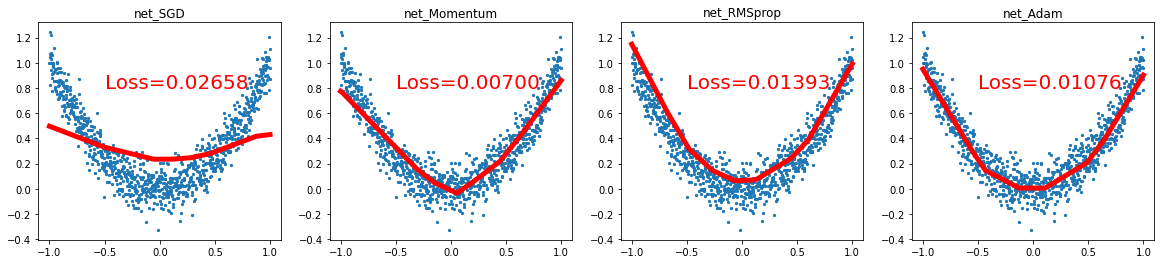

In [154]:
plt.figure(figsize=(20, 4))
names=["net_SGD","net_Momentum","net_RMSprop","net_Adam"]

for i in range(4):
  plt.subplot(1,4,i+1)
  plt.scatter(x.data.numpy(), y.data.numpy(),s=5)
  plt.plot(x.data.numpy(), prediction[i], 'r-', lw=5)
  plt.text(-0.5, 0.8, 'Loss=%.5f ' % losses_his[i][-1], fontdict={'size': 20, 'color':  'red'})
  plt.title(names[i])

# 每一次(step)的收斂LOSS

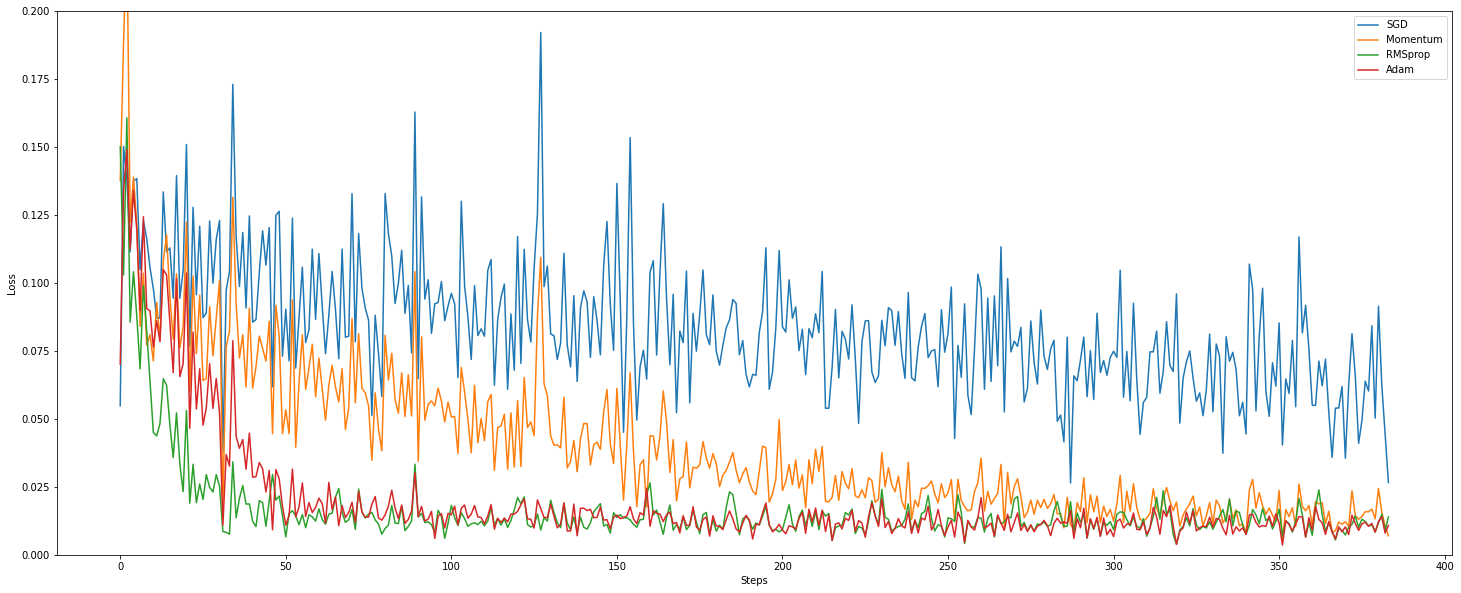

In [159]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
plt.figure(figsize=(25, 10))
for i, l_his in enumerate(losses_his):
  plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()